<a href="https://colab.research.google.com/github/KubilayBildirici/EuroSAT-tensorflow-CNN/blob/main/EuroSAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<left><img src="https://chatgpt.com/backend-api/public_content/enc/eyJpZCI6Im1fNjgzNGUyZDExYzQ0ODE5MWFmMDY1NjI1ZmUyZWRkMzE6ZmlsZV8wMDAwMDAwMDVjNzg2MjQ2YWIyMzcyMWQzOTU4YThmMCIsInRzIjoiNDg1NjM3IiwicCI6InB5aSIsInNpZyI6IjNhNzVmZDc3ODZmNWNiODhiNDM4YmYxOWY2Mjg0Nzk3MGNmYjY4NTgxMDMxZDk2YzRmOGIzMDliZDYwZWE4MDgiLCJ2IjoiMCIsImdpem1vX2lkIjpudWxsfQ==" height=500><center>

## Project Overview — Land-Cover Classification on EuroSAT Satellite Imagery
## 1 ▪ Motivation
Accurate land-cover maps are essential for urban planning, agriculture monitoring and environmental management. Manual annotation of satellite scenes is costly and slow. This project builds a compact convolutional neural network that classifies 10 EuroSAT land-cover classes directly from 64 × 64 Sentinel-2 RGB patches, delivering > 90 % validation accuracy while remaining lightweight enough for rapid batch processing and downstream analysis.

| Property           | Details                                                                                                              |
| ------------------ | -------------------------------------------------------------------------------------------------------------------- |
| Source             | EuroSAT — Sentinel-2 Level-2A reflectance tiles                                                                      |
| Size               | \~27 k RGB images                                                                                                    |
| Spatial resolution | 10 m/px (down-scaled to 64 × 64)                                                                                     |
| Classes            | *AnnualCrop, Forest, HerbaceousVegetation, Highway, Industrial, Pasture, PermanentCrop, Residential, River, SeaLake* |
| Split              | 80 % train · 20 % hold-out test (stratified)                                                       |


In [ ]:
# connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tensorflow

In [ ]:
# check the tensorflow version
import tensorflow as tf
print(tf.__version__)

2.19.0


In [ ]:
# unzip the data
!unzip '/content/drive/MyDrive/Tensorflow By Google/Convolutional Neural Network in Tensorflow/EuroSAT.zip' \
      -d '/content/drive/MyDrive/Tensorflow By Google/Convolutional Neural Network in Tensorflow'

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: /content/drive/MyDrive/Tensorflow By Google/Convolutional Neural Network in Tensorflow/2750/SeaLake/SeaLake_2206.jpg  
  inflating: /content/drive/MyDrive/Tensorflow By Google/Convolutional Neural Network in Tensorflow/2750/SeaLake/SeaLake_1313.jpg  
  inflating: /content/drive/MyDrive/Tensorflow By Google/Convolutional Neural Network in Tensorflow/2750/SeaLake/SeaLake_263.jpg  
  inflating: /content/drive/MyDrive/Tensorflow By Google/Convolutional Neural Network in Tensorflow/2750/SeaLake/SeaLake_967.jpg  
  inflating: /content/drive/MyDrive/Tensorflow By Google/Convolutional Neural Network in Tensorflow/2750/SeaLake/SeaLake_515.jpg  
  inflating: /content/drive/MyDrive/Tensorflow By Google/Convolutional Neural Network in Tensorflow/2750/SeaLake/SeaLake_1465.jpg  
  inflating: /content/drive/MyDrive/Tensorflow By Google/Convolutional Neural Network in Tensorflow/2750/SeaLake/SeaLake_1817.jpg  
  inflating: /content/drive/MyDr

## ⚖ Create train and test files and split the data as 80% train and 20% test

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split
import pandas as pd
from IPython.display import display


extract_dir = '/content/drive/MyDrive/Tensorflow By Google/Convolutional Neural Network in Tensorflow/eurosat_data/2750/'
split_dir = '/content/drive/MyDrive/Tensorflow By Google/Convolutional Neural Network in Tensorflow/EuroSAT_DATASET'
train_dir = os.path.join(split_dir, 'train')
test_dir = os.path.join(split_dir, 'test')

# make train-test directory in EuroSAT_split_data

for d in(train_dir,test_dir):
  os.makedirs(d, exist_ok=True)


# file path & labels
file_path = []
labels = []

for cls in os.listdir(extract_dir):
  cls_folder = os.path.join(extract_dir, cls)
  if not os.path.isdir(cls_folder):
    continue
  for fname in os.listdir(cls_folder):
    path = os.path.join(cls_folder,fname)
    if os.path.isfile(path):
      file_path.append(path)
      labels.append(cls)

# %80 train %20 test
train_paths, test_paths, train_labels, test_labels = train_test_split(
    file_path,labels,test_size=0.2,stratify=labels,random_state=42
)

# copy folder
for path,label in zip(train_paths,train_labels):
  dst_folder = os.path.join(train_dir,label)
  os.makedirs(dst_folder,exist_ok=True)
  shutil.copy(path, dst_folder)
for path,label in zip(test_paths,test_labels):
  dst_folder = os.path.join(test_dir,label)
  os.makedirs(dst_folder,exist_ok=True)
  shutil.copy(path,dst_folder)

train_counts = pd.Series(train_labels).value_counts().sort_index()
test_counts = pd.Series(test_labels).value_counts().sort_index()
df = pd.DataFrame({'train': train_counts, 'test': test_counts})
display(df)

,train,test
AnnualCrop,2400,600
Forest,2400,600
HerbaceousVegetation,2400,600
Highway,2000,500
Industrial,2000,500
Pasture,1600,400
PermanentCrop,2000,500
Residential,2400,600
River,2000,500
SeaLake,2400,600


In [ ]:
import os

for dirpath,dirnames,filenames in os.walk("/content/drive/MyDrive/Tensorflow By Google/Convolutional Neural Network in Tensorflow/EuroSAT_DATASET"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '/content/drive/MyDrive/Tensorflow By Google/Convolutional Neural Network in Tensorflow/EuroSAT_DATASET'.
There are 10 directories and 0 images in '/content/drive/MyDrive/Tensorflow By Google/Convolutional Neural Network in Tensorflow/EuroSAT_DATASET/test'.
There are 0 directories and 600 images in '/content/drive/MyDrive/Tensorflow By Google/Convolutional Neural Network in Tensorflow/EuroSAT_DATASET/test/AnnualCrop'.
There are 0 directories and 500 images in '/content/drive/MyDrive/Tensorflow By Google/Convolutional Neural Network in Tensorflow/EuroSAT_DATASET/test/Industrial'.
There are 0 directories and 600 images in '/content/drive/MyDrive/Tensorflow By Google/Convolutional Neural Network in Tensorflow/EuroSAT_DATASET/test/Forest'.
There are 0 directories and 500 images in '/content/drive/MyDrive/Tensorflow By Google/Convolutional Neural Network in Tensorflow/EuroSAT_DATASET/test/PermanentCrop'.
There are 0 directories and 600 images in '/con

## How many images are on the labels inside the train data?

In [ ]:
%cd /content/drive/MyDrive/Tensorflow By Google/Convolutional Neural Network in Tensorflow/

images_train_for_AnnualCrop = os.listdir("EuroSAT_DATASET/train/AnnualCrop")
images_train_for_Forest = os.listdir("EuroSAT_DATASET/train/Forest")
images_train_for_HerbaceousVegetation = os.listdir("EuroSAT_DATASET/train/HerbaceousVegetation")
images_train_for_Highway = os.listdir("EuroSAT_DATASET/train/Highway")
images_train_for_Industrial = os.listdir("EuroSAT_DATASET/train/Industrial")
images_train_for_Pasture = os.listdir("EuroSAT_DATASET/train/Pasture")
images_train_for_PermanentCrop = os.listdir("EuroSAT_DATASET/train/PermanentCrop")
images_train_for_Residential = os.listdir("EuroSAT_DATASET/train/Residential")
images_train_for_River = os.listdir("EuroSAT_DATASET/train/River")
images_train_for_SeaLake = os.listdir("EuroSAT_DATASET/train/SeaLake")



num_annunalcrop_train = len(images_train_for_AnnualCrop)

num_forest_train = len(images_train_for_Forest)

num_Herbaceousvegetation_train = len(images_train_for_HerbaceousVegetation)

num_highway_train = len(images_train_for_Highway)

num_industrial_train = len(images_train_for_Industrial)

num_pasture_train = len(images_train_for_Pasture)

num_permanentcrop_train = len(images_train_for_PermanentCrop)

num_residential_train = len(images_train_for_Residential)

num_river_train = len(images_train_for_River)

num_sealake_train = len(images_train_for_SeaLake)




print(f"images train AnnualCrop  = {num_annunalcrop_train}")

print(f"images train Forest  = {num_forest_train}")

print(f"images train herbaceousvegetation  = {num_Herbaceousvegetation_train}")

print(f"images train highway  = {num_highway_train}")

print(f"images train industrial  = {num_industrial_train}")

print(f"images train pasture  = {num_pasture_train}")

print(f"images train permanentcrop  = {num_permanentcrop_train}")

print(f"images train residential  = {num_residential_train}")

print(f"images train river  = {num_river_train}")

print(f"images train sealake  = {num_sealake_train}")



/content/drive/MyDrive/Tensorflow By Google/Convolutional Neural Network in Tensorflow
images train AnnualCrop  = 2400
images train Forest  = 2400
images train herbaceousvegetation  = 2400
images train highway  = 2000
images train industrial  = 2000
images train pasture  = 1600
images train permanentcrop  = 2000
images train residential  = 2400
images train river  = 2000
images train sealake  = 2400


## How many images are on the labels inside the test data?

In [ ]:
images_test_for_AnnualCrop = os.listdir("EuroSAT_DATASET/test/AnnualCrop")
images_test_for_Forest = os.listdir("EuroSAT_DATASET/test/Forest")
images_test_for_HerbaceousVegetation = os.listdir("EuroSAT_DATASET/test/HerbaceousVegetation")
images_test_for_Highway = os.listdir("EuroSAT_DATASET/test/Highway")
images_test_for_Industrial = os.listdir("EuroSAT_DATASET/test/Industrial")
images_test_for_Pasture = os.listdir("EuroSAT_DATASET/test/Pasture")
images_test_for_PermanentCrop = os.listdir("EuroSAT_DATASET/test/PermanentCrop")
images_test_for_Residential = os.listdir("EuroSAT_DATASET/test/Residential")
images_test_for_River = os.listdir("EuroSAT_DATASET/test/River")
images_test_for_SeaLake = os.listdir("EuroSAT_DATASET/test/SeaLake")



num_annunalcrop_test = len(images_test_for_AnnualCrop)

num_forest_test = len(images_test_for_Forest)

num_Herbaceousvegetation_test = len(images_test_for_HerbaceousVegetation)

num_highway_test = len(images_test_for_Highway)

num_industrial_test = len(images_test_for_Industrial)

num_pasture_test = len(images_test_for_Pasture)

num_permanentcrop_test = len(images_test_for_PermanentCrop)

num_residential_test = len(images_test_for_Residential)

num_river_test = len(images_test_for_River)

num_sealake_test = len(images_test_for_SeaLake)




print(f"images test AnnualCrop  = {num_annunalcrop_test}")

print(f"images test Forest  = {num_forest_test}")

print(f"images test herbaceousvegetation  = {num_Herbaceousvegetation_test}")

print(f"images test highway  = {num_highway_test}")

print(f"images test industrial  = {num_industrial_test}")

print(f"images test pasture  = {num_pasture_test}")

print(f"images test permanentcrop  = {num_permanentcrop_test}")

print(f"images test residential  = {num_residential_test}")

print(f"images test river  = {num_river_test}")

print(f"images test sealake  = {num_sealake_test}")



images test AnnualCrop  = 600
images test Forest  = 600
images test herbaceousvegetation  = 600
images test highway  = 500
images test industrial  = 500
images test pasture  = 400
images test permanentcrop  = 500
images test residential  = 600
images test river  = 500
images test sealake  = 600


## Review data labels

In [ ]:
# get class names
import pathlib
import numpy as np

data_dir = pathlib.Path("/content/drive/MyDrive/Tensorflow By Google/Convolutional Neural Network in Tensorflow/EuroSAT_DATASET/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['AnnualCrop' 'Forest' 'HerbaceousVegetation' 'Highway' 'Industrial'
 'Pasture' 'PermanentCrop' 'Residential' 'River' 'SeaLake']


## Visualize Data

In [ ]:
# let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder),1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"image shape = {img.shape}")
  return img

image shape = (64, 64, 3)


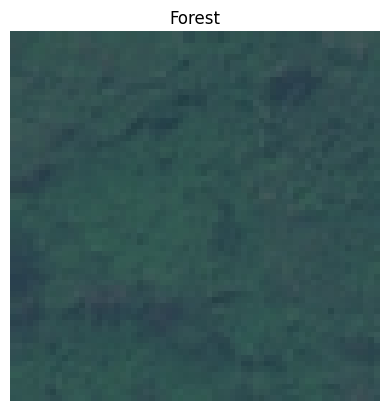

In [ ]:
img_forest = view_random_image(target_dir = "/content/drive/MyDrive/Tensorflow By Google/Convolutional Neural Network in Tensorflow/EuroSAT_DATASET/train/",
                        target_class = "Forest")

image shape = (64, 64, 3)


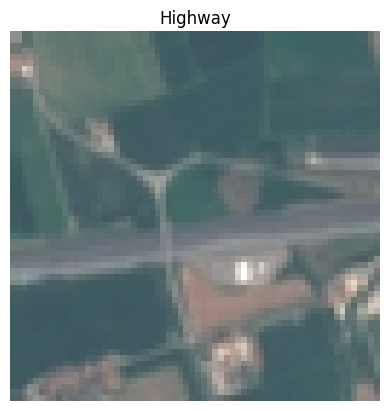

In [ ]:
img_highway = view_random_image(target_dir = "/content/drive/MyDrive/Tensorflow By Google/Convolutional Neural Network in Tensorflow/EuroSAT_DATASET/train/",
                        target_class = "Highway")

image shape = (64, 64, 3)


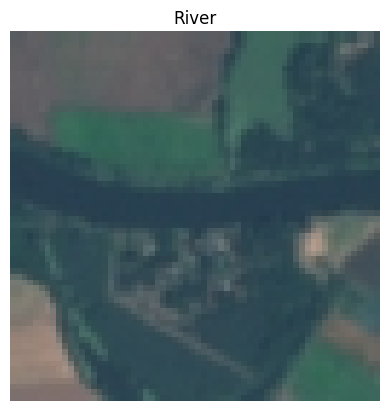

In [ ]:
img_river = view_random_image(target_dir = "/content/drive/MyDrive/Tensorflow By Google/Convolutional Neural Network in Tensorflow/EuroSAT_DATASET/train/",
                        target_class = "River")

image shape = (64, 64, 3)


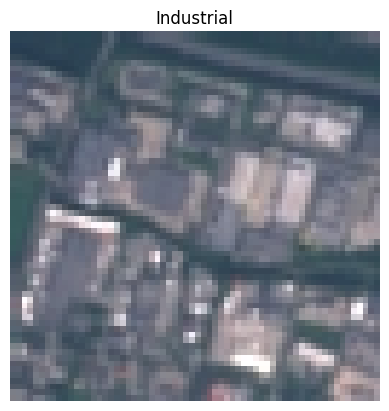

In [ ]:
img_industrial = view_random_image(target_dir = "/content/drive/MyDrive/Tensorflow By Google/Convolutional Neural Network in Tensorflow/EuroSAT_DATASET/train/",
                        target_class = "Industrial")

image shape = (64, 64, 3)


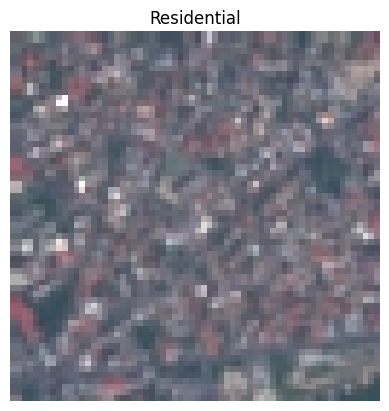

In [ ]:
img_residential = view_random_image(target_dir = "/content/drive/MyDrive/Tensorflow By Google/Convolutional Neural Network in Tensorflow/EuroSAT_DATASET/train/",
                        target_class = "Residential")

In [ ]:
from tensorflow import keras
import tensorflow as tf

train_dir = "/content/drive/MyDrive/Tensorflow By Google/Convolutional Neural Network in Tensorflow/EuroSAT_DATASET/train"
test_dir = "/content/drive/MyDrive/Tensorflow By Google/Convolutional Neural Network in Tensorflow/EuroSAT_DATASET/test"

img_size = (64,64)
batch_size = 64


train_ds = keras.utils.image_dataset_from_directory(
    directory = train_dir,
    image_size = img_size,
    batch_size = batch_size,
    label_mode = "categorical",
    shuffle = True,
    seed = 42
)

test_ds = keras.utils.image_dataset_from_directory(
    directory = test_dir,
    image_size = img_size,
    batch_size = batch_size,
    label_mode = "categorical",
    shuffle = False
)

AUTOTUNE = tf.data.AUTOTUNE

train_ds = (train_ds
            .shuffle(1000)
            .cache()
            .prefetch(AUTOTUNE))

val_ds = test_ds.cache().prefetch(AUTOTUNE)

Found 21600 files belonging to 10 classes.
Found 5400 files belonging to 10 classes.


In [ ]:
# build first Tiny-VGG model

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(64,64,3)),
    tf.keras.layers.Rescaling(1./255),

    # Blok - 1
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=(3,3),
                           padding="valid",
                           strides=(1,1),
                           activation="relu"),
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=(3,3),
                           padding="valid",
                           strides=(1,1),
                           activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),

    # Blok - 2
    tf.keras.layers.Conv2D(filters=64,
                           kernel_size=(3,3),
                           padding="valid",
                           strides=(1,1),
                           activation="relu"),
    tf.keras.layers.Conv2D(filters=64,
                           kernel_size=(3,3),
                           padding="valid",
                           strides=(1,1),
                           activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation="softmax")
])

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1000,
    decay_rate=0.96,
    staircase=True
)


# compile the model
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = lr_schedule),
                metrics=["accuracy"])


In [ ]:
model_1.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_12 (Rescaling)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_66 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_67 (Conv2D)              │ (None, 60, 60, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_68 (Conv2D)              │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_69 (Conv2D)              │ (None, 26, 26, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 512)            │     5,538,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,609,002 (21.40 MB)

 Trainable params: 5,609,002 (21.40 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_1 = model_1.fit(train_ds,
                        epochs=10,
                        validation_data = val_ds)

Epoch 1/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 77s 108ms/step - accuracy: 0.3286 - loss: 1.7176 - val_accuracy: 0.5770 - val_loss: 1.1706
Epoch 2/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 29s 86ms/step - accuracy: 0.6388 - loss: 0.9887 - val_accuracy: 0.7567 - val_loss: 0.6815
Epoch 3/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 29s 86ms/step - accuracy: 0.7427 - loss: 0.7078 - val_accuracy: 0.7800 - val_loss: 0.6284
Epoch 4/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 29s 85ms/step - accuracy: 0.7763 - loss: 0.6158 - val_accuracy: 0.8285 - val_loss: 0.4898
Epoch 5/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 29s 85ms/step - accuracy: 0.8130 - loss: 0.5271 - val_accuracy: 0.8189 - val_loss: 0.5079
Epoch 6/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 28s 82ms/step - accuracy: 0.8366 - loss: 0.4725 - val_accuracy: 0.8546 - val_loss: 0.4073
Epoch 7/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 29s 85ms/step - accuracy: 0.8501 - loss: 0.4270 - val_accuracy: 0.8485 - val_loss: 0.4369
Epoch 8/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 29s 84ms/step - accuracy: 0.8639 - loss: 0.3824 -

In [ ]:
# evaluate model_1
model_1.evaluate(val_ds)

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8561 - loss: 0.4464


[0.4784444272518158, 0.8487036824226379]

In [ ]:
# plot the validation and training curves separately

def plot_loss_curves(history):

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  fig, ax = plt.subplots(1, 2, figsize=(14,4),sharex=True)

  # --- Loss ---
  ax[0].plot(epochs,loss,label="train")
  ax[0].plot(epochs,val_loss, label="val")
  ax[0].set_title("Loss")
  ax[0].set_xlabel("Epochs")
  ax[0].legend()

  # --- Accuracy ---
  ax[1].plot(epochs,accuracy,label="train")
  ax[1].plot(epochs, val_accuracy)
  ax[1].set_title("Accuracy")
  ax[1].set_xlabel("Epochs")
  ax[1].legend()

  fig.tight_layout()
  plt.show()


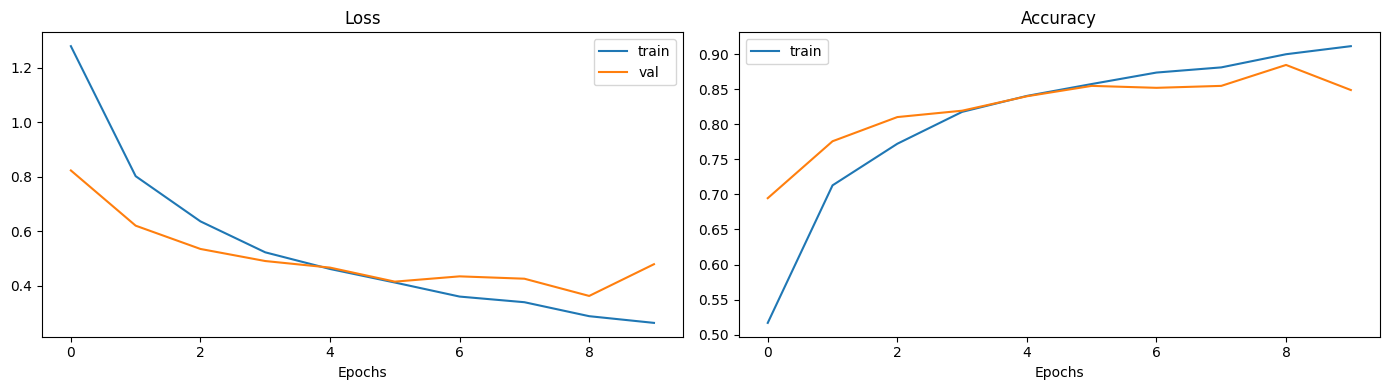

In [ ]:
plot_loss_curves(history_1)

Text(0.5, 1.0, 'Finding ideal learning rate')

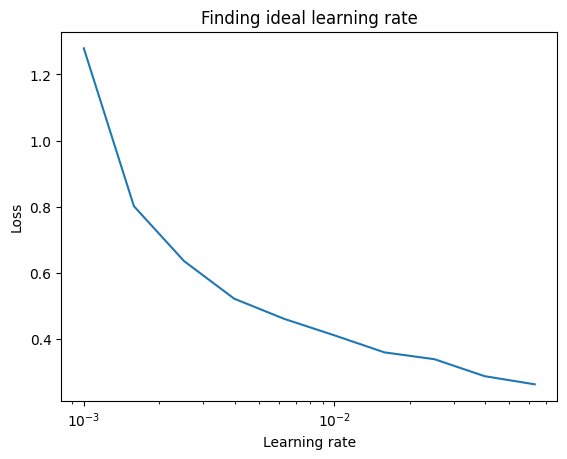

In [ ]:
# Finding learning rate
lrs = 1e-3 * (10**(tf.range(10)/5))
plt.semilogx(lrs,history_1.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding ideal learning rate")

In [ ]:
predict_1 = model_1.predict(val_ds)
predict_1

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


array([[9.9949342e-01, 1.2218976e-09, 1.4475461e-06, ..., 3.0568489e-11,
        4.1787128e-04, 1.5924024e-06],
       [9.9579132e-01, 3.5930128e-08, 3.8586778e-03, ..., 2.0969093e-08,
        1.2764835e-05, 2.2398338e-04],
       [9.2301262e-04, 8.4591093e-06, 6.2500693e-02, ..., 1.7253991e-04,
        4.0891805e-01, 4.8007627e-04],
       ...,
       [5.8778638e-01, 2.8503826e-04, 1.7270537e-02, ..., 4.5555671e-06,
        2.7693681e-02, 2.4455431e-01],
       [7.1978552e-12, 4.9780549e-08, 7.4784387e-11, ..., 8.7100584e-22,
        2.4035191e-15, 9.9999994e-01],
       [1.6345622e-05, 3.1488238e-05, 2.7082249e-08, ..., 3.7166228e-13,
        5.7634331e-11, 9.9995202e-01]], dtype=float32)

In [ ]:
y_pred = np.argmax(predict_1, axis=1)          # shape = (N,)


In [ ]:
import numpy as np
y_true = np.concatenate([
    np.argmax(labels.numpy(), axis=1)
    if labels.ndim > 1 else labels.numpy()
    for images, labels in val_ds
], axis=0)

In [ ]:
print("y_true.shape:", y_true.shape)
print("y_pred.shape:", y_pred.shape)

y_true.shape: (5400,)
y_pred.shape: (5400,)


In [ ]:
# create confusion matrix


import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None,
                          figsize=(10,10), text_size=12, only_percent=True):
    # 1) y_pred'i integer NumPy dizisine dönüştür
    y_pred = np.array(y_pred).astype(int).ravel()
    y_true = np.array(y_true).astype(int).ravel()

    # 2) Confusion matrix hesapla
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]
    n = cm.shape[0]

    # 3) Görselleştirme tuvali
    fig, ax = plt.subplots(figsize=figsize)
    im = ax.imshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(im, ax=ax)

    # 4) Etiketler
    if classes is not None:
        labels = classes
    else:
        labels = np.arange(n)

    ax.set_xticks(np.arange(n))
    ax.set_yticks(np.arange(n))
    ax.set_xticklabels(labels, rotation=45, ha="right", fontsize=text_size)
    ax.set_yticklabels(labels, fontsize=text_size)
    ax.set_xlabel("Predicted label", fontsize=text_size+2)
    ax.set_ylabel("True label", fontsize=text_size+2)
    ax.set_title("Confusion Matrix", fontsize=text_size+4)

    # 5) Her hücreye metni ekle
    thresh = cm.max() / 2
    for i, j in itertools.product(range(n), range(n)):
        if only_percent:
            txt = f"{cm_norm[i,j]*100:.1f}%"
        else:
            txt = f"{cm[i,j]}"
        color = "white" if cm[i,j] > thresh else "black"
        ax.text(j, i, txt,
                ha="center", va="center",
                color=color, size=text_size)

    plt.tight_layout()
    plt.show()



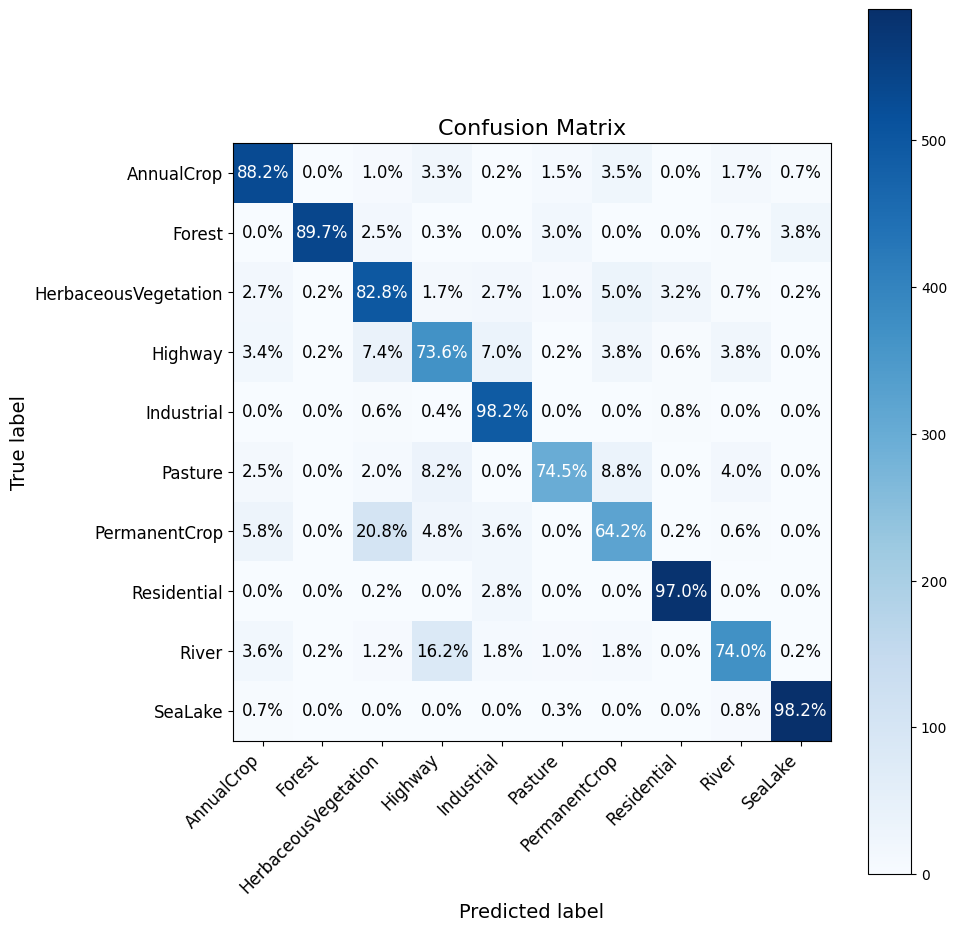

In [ ]:
make_confusion_matrix(
    y_true=y_true,
    y_pred=y_pred,
    classes=class_names,
    figsize=(10,10),
    text_size=12
)

In [ ]:
# create model_2 with augmented data

model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(64,64,3)),
    tf.keras.layers.Rescaling(1./255),

    # Blok - 1
    tf.keras.layers.Conv2D(filters=64,
                           kernel_size=(3,3),
                           padding="valid",
                           strides=(1,1),
                           activation="relu"),
    tf.keras.layers.Conv2D(filters=64,
                           kernel_size=(3,3),
                           padding="valid",
                           strides=(1,1),
                           activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),

    # Blok - 2
    tf.keras.layers.Conv2D(filters=128,
                           kernel_size=(3,3),
                           padding="valid",
                           strides=(1,1),
                           activation="relu"),
    tf.keras.layers.Conv2D(filters=128,
                           kernel_size=(3,3),
                           padding="valid",
                           strides=(1,1),
                           activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation="softmax")
])

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate = 3e-3,
    decay_steps = 1000,
    decay_rate = 0.96,
    staircase = True
)

# compile the model
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = lr_schedule),
                metrics=["accuracy"])

# callbacks
callbacks = tf.keras.callbacks.ReduceLROnPlateau(
    monitor = 'val_loss',
    factor = 0.5,
    patience = 3,
    min_lr = 3e-5,
    verbose = 1
)

In [ ]:
model_2.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_22 (Rescaling)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_85 (Conv2D)              │ (None, 62, 62, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_86 (Conv2D)              │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_63 (Dropout)            │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_87 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_88 (Conv2D)              │ (None, 26, 26, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D) │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_64 (Dropout)            │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_21 (Flatten)            │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 512)            │    11,076,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_65 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,341,386 (43.26 MB)

 Trainable params: 11,341,386 (43.26 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_2 = model_2.fit(train_ds,
                        epochs=10,
                        validation_data = val_ds,
                        callbacks=callbacks)

Epoch 1/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 189s 307ms/step - accuracy: 0.2185 - loss: 2.1156 - val_accuracy: 0.3204 - val_loss: 1.6589 - learning_rate: 0.0030
Epoch 2/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 89s 265ms/step - accuracy: 0.3132 - loss: 1.6814 - val_accuracy: 0.3854 - val_loss: 1.5470 - learning_rate: 0.0030
Epoch 3/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 89s 262ms/step - accuracy: 0.3937 - loss: 1.5176 - val_accuracy: 0.4752 - val_loss: 1.3372 - learning_rate: 0.0029
Epoch 4/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 89s 265ms/step - accuracy: 0.4962 - loss: 1.3341 - val_accuracy: 0.6272 - val_loss: 1.1236 - learning_rate: 0.0029
Epoch 5/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 89s 264ms/step - accuracy: 0.6165 - loss: 1.0778 - val_accuracy: 0.6681 - val_loss: 0.9285 - learning_rate: 0.0029
Epoch 6/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 88s 261ms/step - accuracy: 0.6663 - loss: 0.9347 - val_accuracy: 0.6900 - val_loss: 0.8112 - learning_rate: 0.0028
Epoch 7/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 88s 260ms/step - accuracy: 0.

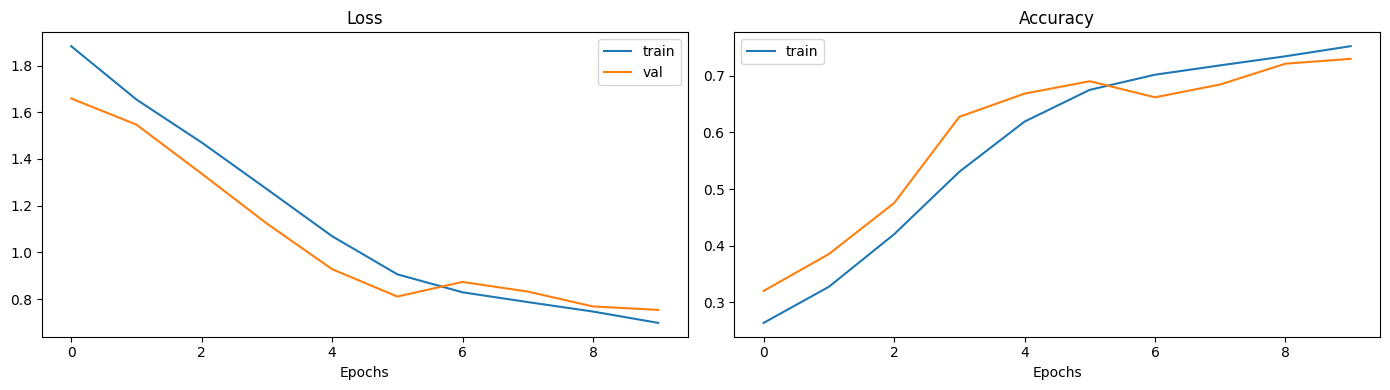

In [ ]:
# check loss and accuracy
plot_loss_curves(history_2)

In [ ]:
model_2.evaluate(val_ds)

85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.7481 - loss: 0.7214


[0.7541168928146362, 0.7294444441795349]

In [ ]:
predict_2 = model_2.predict(val_ds)
y_pred_2 = np.argmax(predict_2, axis=1)          # shape = (N,)


85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step


In [ ]:
print("y_true.shape:", y_true.shape)
print("y_pred.shape:", y_pred_2.shape)

y_true.shape: (5400,)
y_pred.shape: (5400,)


### Model-2 Confusion matrix

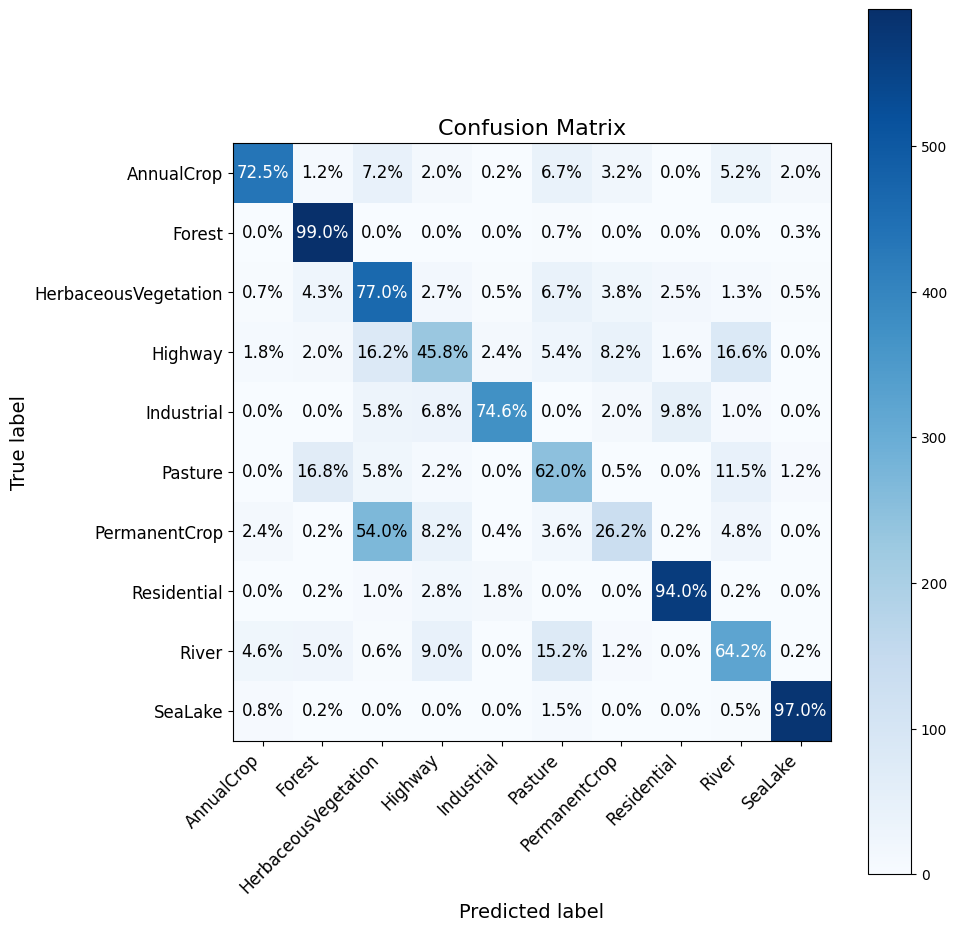

In [ ]:
make_confusion_matrix(
    y_true=y_true,
    y_pred=y_pred_2,
    classes=class_names,
    figsize=(10,10),
    text_size=12
)

In [ ]:
# create model-3

model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(64,64,3)),
    tf.keras.layers.Rescaling(1./255),

    # Blok - 1
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=(3,3),
                           strides=(1,1),
                           padding="same",
                           activation="relu"),

    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=(3,3),
                           strides=(1,1),
                           padding="same",
                           activation="relu"),

    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.Dropout(0.25),

    # Blok-2
    tf.keras.layers.Conv2D(filters=64,
                           kernel_size=(3,3),
                           strides=(1,1),
                           padding="same",
                           activation="relu"),

    tf.keras.layers.Conv2D(filters=64,
                           kernel_size=(3,3),
                           strides=(1,1),
                           padding="same",
                           activation="relu"),

    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.Dropout(0.25),

    # Blok-3
    tf.keras.layers.Conv2D(filters=128,
                           kernel_size=(3,3),
                           strides=(1,1),
                           padding="same",
                           activation="relu"),

    tf.keras.layers.Conv2D(filters=128,
                           kernel_size=(3,3),
                           strides=(1,1),
                           padding="same",
                           activation="relu"),

    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.Dropout(0.25),


    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation="softmax"),
])


model_3.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5,clipnorm=0.5),
                metrics=["accuracy"])

# callbacks
callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=3, min_lr=1e-5, verbose=1
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss", patience=5, restore_best_weights=True
    )
]


In [ ]:
model_3.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_9 (Rescaling)         │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,386,986 (9.11 MB)

 Trainable params: 2,386,986 (9.11 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_3 = model_3.fit(train_ds,
                        epochs=15,
                        validation_data = val_ds,
                        callbacks=callbacks)

Epoch 1/15
338/338 ━━━━━━━━━━━━━━━━━━━━ 50s 139ms/step - accuracy: 0.1330 - loss: 2.2086 - val_accuracy: 0.2931 - val_loss: 1.7939 - learning_rate: 3.0000e-05
Epoch 2/15
338/338 ━━━━━━━━━━━━━━━━━━━━ 47s 140ms/step - accuracy: 0.3088 - loss: 1.7525 - val_accuracy: 0.3715 - val_loss: 1.6474 - learning_rate: 3.0000e-05
Epoch 3/15
338/338 ━━━━━━━━━━━━━━━━━━━━ 46s 135ms/step - accuracy: 0.4003 - loss: 1.5340 - val_accuracy: 0.4593 - val_loss: 1.4010 - learning_rate: 3.0000e-05
Epoch 4/15
338/338 ━━━━━━━━━━━━━━━━━━━━ 45s 134ms/step - accuracy: 0.4670 - loss: 1.3496 - val_accuracy: 0.5713 - val_loss: 1.2120 - learning_rate: 3.0000e-05
Epoch 5/15
338/338 ━━━━━━━━━━━━━━━━━━━━ 45s 133ms/step - accuracy: 0.5532 - loss: 1.2020 - val_accuracy: 0.6019 - val_loss: 1.1170 - learning_rate: 3.0000e-05
Epoch 6/15
338/338 ━━━━━━━━━━━━━━━━━━━━ 45s 133ms/step - accuracy: 0.5916 - loss: 1.1231 - val_accuracy: 0.5781 - val_loss: 1.1511 - learning_rate: 3.0000e-05
Epoch 7/15
338/338 ━━━━━━━━━━━━━━━━━━━━ 45s 13

In [ ]:
model_3.evaluate(val_ds)

85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.6508 - loss: 1.0462


[1.1030443906784058, 0.6051852107048035]

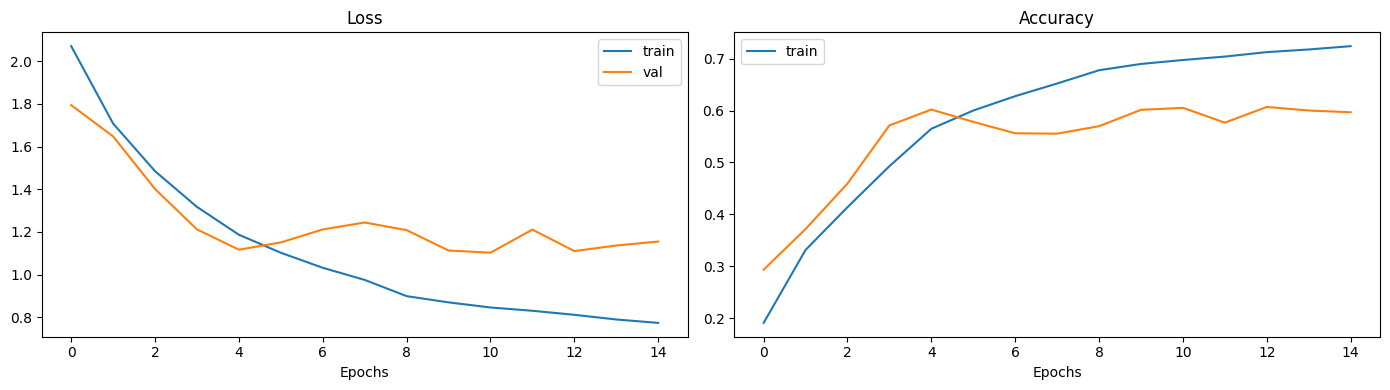

In [ ]:
plot_loss_curves(history_3)

In [ ]:
predict_3 = model_3.predict(val_ds)
y_pred_3 = np.argmax(predict_3, axis=1)          # shape = (N,)

85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step


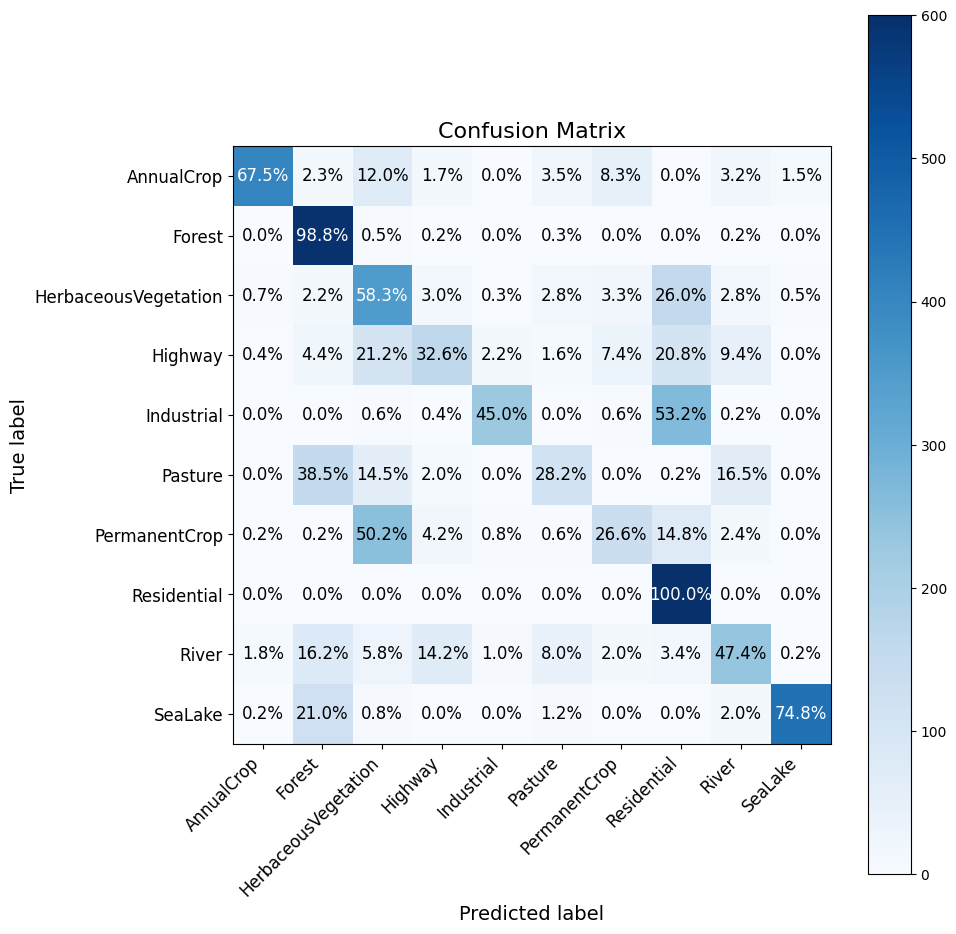

In [ ]:
make_confusion_matrix(
    y_true=y_true,
    y_pred=y_pred_3,
    classes=class_names,
    figsize=(10,10),
    text_size=12
)

### Model-1 is the best model
* Let's visualize model_1 on custom images

In [ ]:
# create a function for preprocessing custom image
def load_and_prep_image(file_name,img_shape=(64)):
  img = tf.io.read_file(file_name)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size=[img_shape,img_shape])

  return img

In [ ]:
def pred_and_plot(model,filename,class_names=class_names):
  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img,axis=0))

  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  plt.imshow(tf.cast(img, tf.uint8))  # uint8’e çevir
  plt.title(f"Prediction: {pred_class}")
  plt.axis("off")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


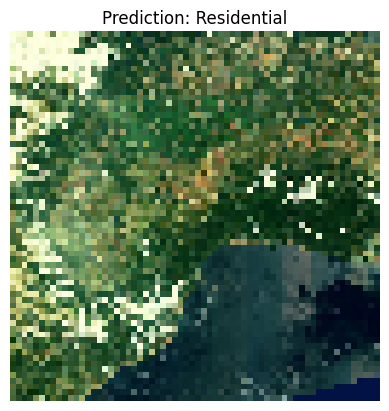

In [ ]:
pred_and_plot(model_3, "/content/drive/MyDrive/Tensorflow By Google/Convolutional Neural Network in Tensorflow/test/euroSAT_custom_image/Northwest_Italy_and_southern_France_pillars.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


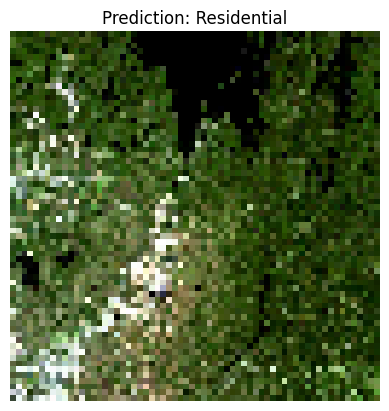

In [ ]:
pred_and_plot(model_3, "/content/drive/MyDrive/Tensorflow By Google/Convolutional Neural Network in Tensorflow/test/euroSAT_custom_image/R.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


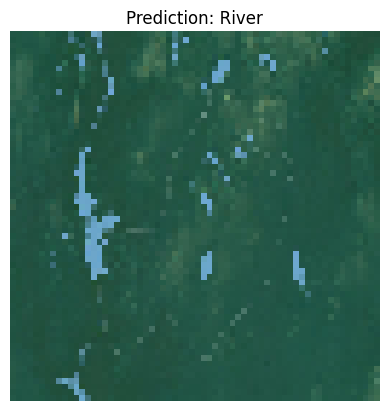

In [ ]:
pred_and_plot(model_3, "/content/drive/MyDrive/Tensorflow By Google/Convolutional Neural Network in Tensorflow/test/euroSAT_custom_image/360_F_336858721_TyGbXe8cB2Wh7PzfhMbGQOb4OmQsfCyz.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


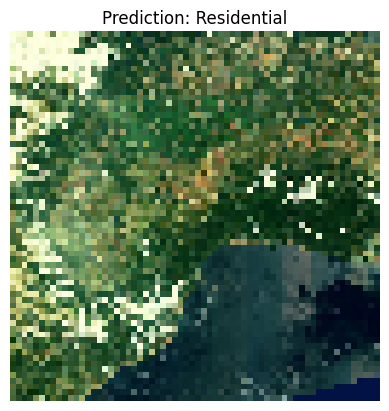

In [ ]:
pred_and_plot(model_1, "/content/drive/MyDrive/Tensorflow By Google/Convolutional Neural Network in Tensorflow/test/euroSAT_custom_image/Northwest_Italy_and_southern_France_pillars.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


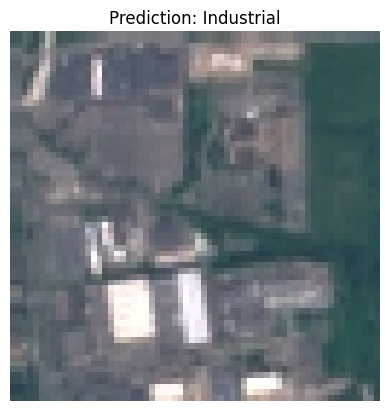

In [ ]:
pred_and_plot(model_1, "/content/drive/MyDrive/Tensorflow By Google/Convolutional Neural Network in Tensorflow/test/euroSAT_custom_image/Industrial_1272.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


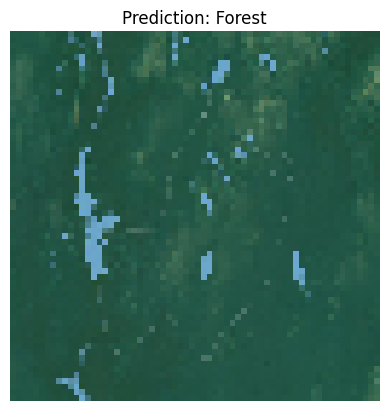

In [ ]:
pred_and_plot(model_1, "/content/drive/MyDrive/Tensorflow By Google/Convolutional Neural Network in Tensorflow/test/euroSAT_custom_image/360_F_336858721_TyGbXe8cB2Wh7PzfhMbGQOb4OmQsfCyz.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


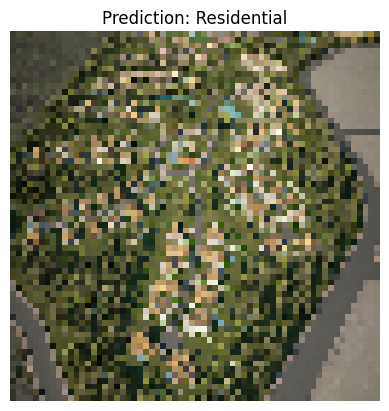

In [ ]:
pred_and_plot(model_1, "/content/drive/MyDrive/Tensorflow By Google/Convolutional Neural Network in Tensorflow/test/euroSAT_custom_image/konut.jpeg")

In [ ]:
save_path = "/content/drive/MyDrive/Tensorflow By Google/model.keras"
model_1.save(save_path)
print("✅ Model Saved →", save_path)


✅ Model Saved → /content/drive/MyDrive/Tensorflow By Google/model.keras
